# Preliminary Study

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_path = "../data/analyze_bos"

/tmp/ipykernel_675/468678224.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
# Get the number of entries in each csv file in the data directory
file_entries = {}

for filename in os.listdir(data_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_path, filename)
        df = pd.read_csv(file_path)
        data_year = filename.split(".")[0].split("_")[-1]
        file_entries[data_year] = len(df)

/tmp/ipykernel_675/2812687726.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_675/2812687726.py:7: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_675/2812687726.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_675/2812687726.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_675/2812687726.py:7: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_675/2812687726.py:7: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(

2011: 58262 entries
2012: 118092 entries
2013: 142610 entries
2014: 147820 entries
2015: 210083 entries
2016: 216535 entries
2017: 251269 entries
2018: 262748 entries
2019: 259022 entries
2020: 251222 entries
2021: 273784 entries
2022: 276599 entries
2023: 313226 entries
2024: 35452 entries


<BarContainer object of 14 artists>

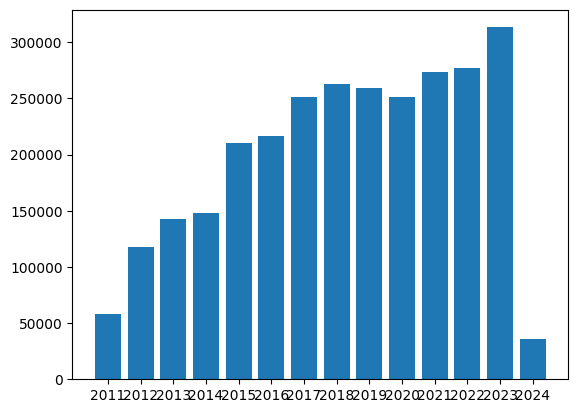

In [6]:
file_entries = dict(sorted(file_entries.items(), key=lambda item: item[0], reverse=False))
for filename, entries in file_entries.items():
    print(f"{filename}: {entries} entries")

# plot the number of entries in each csv file

plt.bar(file_entries.keys(), file_entries.values())

In [9]:
# In each file, get the number of entries contained "animal", "dog", "cat" or "rat" in the "reason" column.
# Get the number of entries of each keyword individually and plot the number of entries in each csv file.

keywords = ["animal", "dog", "cat", "rat"]
keyword_entries = {keyword: {} for keyword in keywords}

for filename in os.listdir(data_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_path, filename)
        df = pd.read_csv(file_path)
        data_year = filename.split(".")[0].split("_")[-1]
        for keyword in keywords:
            keyword_entries[keyword][data_year] = len(df[df["reason"].str.contains(keyword, case=False)])

for keyword in keywords:
    keyword_entries[keyword] = dict(sorted(keyword_entries[keyword].items(), key=lambda item: item[0], reverse=False))
    for filename, entries in keyword_entries[keyword].items():
        print(f"{keyword} in {filename}: {entries} entries")


/tmp/ipykernel_675/2434107630.py:10: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_675/2434107630.py:10: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_675/2434107630.py:10: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_675/2434107630.py:10: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_675/2434107630.py:10: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_675/2434107630.py:10: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.rea

animal in 2011: 0 entries
animal in 2012: 0 entries
animal in 2013: 404 entries
animal in 2014: 2718 entries
animal in 2015: 3168 entries
animal in 2016: 3012 entries
animal in 2017: 3036 entries
animal in 2018: 2979 entries
animal in 2019: 3508 entries
animal in 2020: 3239 entries
animal in 2021: 4106 entries
animal in 2022: 4031 entries
animal in 2023: 4155 entries
animal in 2024: 343 entries
dog in 2011: 0 entries
dog in 2012: 0 entries
dog in 2013: 0 entries
dog in 2014: 0 entries
dog in 2015: 0 entries
dog in 2016: 0 entries
dog in 2017: 0 entries
dog in 2018: 0 entries
dog in 2019: 0 entries
dog in 2020: 0 entries
dog in 2021: 0 entries
dog in 2022: 0 entries
dog in 2023: 0 entries
dog in 2024: 0 entries
cat in 2011: 513 entries
cat in 2012: 1316 entries
cat in 2013: 1458 entries
cat in 2014: 1422 entries
cat in 2015: 1263 entries
cat in 2016: 1223 entries
cat in 2017: 1298 entries
cat in 2018: 1417 entries
cat in 2019: 1253 entries
cat in 2020: 1261 entries
cat in 2021: 1319 ent

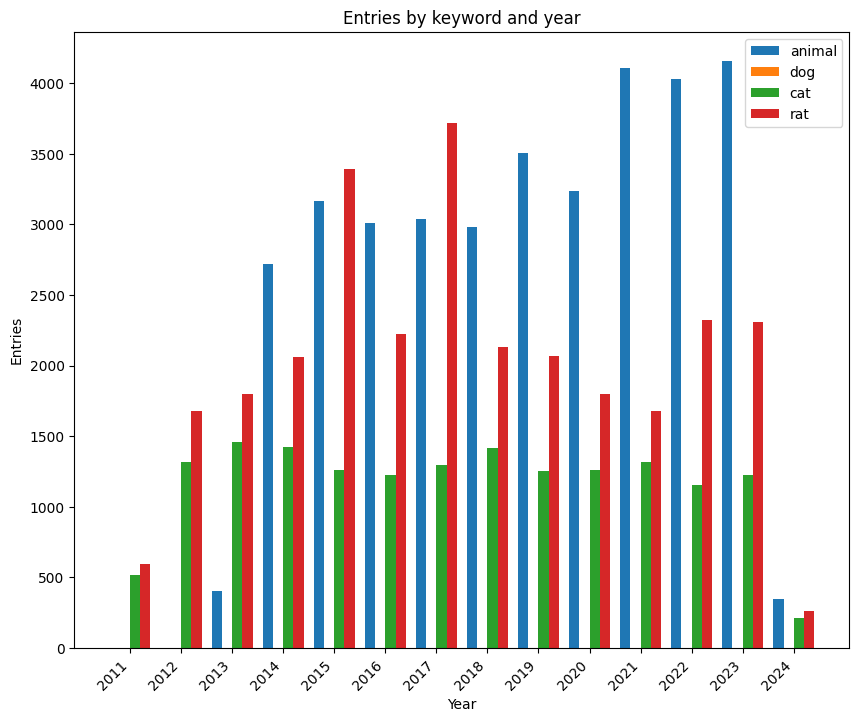

In [8]:

fig, ax = plt.subplots()
bar_width = 0.2
index = np.arange(len(file_entries))
for i, keyword in enumerate(keywords):
    ax.bar(index + i * bar_width, keyword_entries[keyword].values(), bar_width, label=keyword)

ax.set_xlabel('Year')
ax.set_ylabel('Entries')
ax.set_title('Entries by keyword and year')
ax.set_xticks(index + bar_width * (len(keywords) - 1) / 2)
ax.set_xticklabels(file_entries.keys())
ax.legend()
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate labels to 45 degrees and align right
fig.set_size_inches(10, 8)  # Width, Height in inches
plt.show()


# Map

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../Datasets/animal_cases.csv")
df.head()

/tmp/ipykernel_32718/2069918479.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Datasets/animal_cases.csv")


,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,...,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source,year
0,101000295622,2011-07-01 02:44:50,2011-07-04 02:44:49,2011-07-01 02:44:55,ONTIME,Closed,Case Closed Internal Case,Pick up Dead Animal,Public Works Department,Street Cleaning,...,7,Ward 16,1602,305 Freeport St,2122.0,42.302020,-71.051911,0101000020E6100000AC4EA98052C351C098735293A826...,Employee Generated,2011
1,101000295636,2011-07-01 03:44:54,2011-07-04 03:44:53,2011-07-01 05:19:44,ONTIME,Closed,Case Closed Case Resolved Pickup Dead Animal (...,Pick up Dead Animal,Public Works Department,Street Cleaning,...,9,Ward 18,1801,10 Ledgebrook Rd,2126.0,42.270690,-71.083371,0101000020E61000009AEA0EF255C551C0821CA0F4A522...,Constituent Call,2011
2,101000295715,2011-07-01 04:40:53,2011-07-04 04:40:53,2011-07-01 05:18:50,ONTIME,Closed,Case Closed Case Resolved,Pick up Dead Animal,Public Works Department,Street Cleaning,...,2,Ward 2,0202,114 Sixteenth St,2129.0,42.379345,-71.051074,0101000020E6100000EA197ECD44C351C06EBE625C8E30...,Constituent Call,2011
3,101000295859,2011-07-01 06:51:01,2011-07-04 06:51:00,2011-07-01 06:51:08,ONTIME,Closed,Case Closed Internal Case,Pick up Dead Animal,Public Works Department,Street Cleaning,...,8,Ward 15,1504,10 Hendry St,2125.0,42.308970,-71.064861,0101000020E61000004562F4AC26C451C0B1264B508C27...,Employee Generated,2011
4,101000295903,2011-07-01 07:46:49,2011-07-04 07:46:45,2011-07-01 09:15:33,ONTIME,Closed,Case Closed Case Resolved picked up,Pick up Dead Animal,Public Works Department,Street Cleaning,...,10,Ward 18,1813,69 Davison St,2136.0,42.257640,-71.117461,0101000020E6100000F91C537A84C751C0FE88B655FA20...,Employee Generated,2011


In [5]:
df_sample = pd.read_csv("../Datasets/Analyze Boston/Boston_311_service_request_2018.csv")
df.head()

/tmp/ipykernel_32718/2618064873.py:1: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sample = pd.read_csv("../Datasets/Analyze Boston/Boston_311_service_request_2018.csv")


,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,...,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source,year
0,101000295622,2011-07-01 02:44:50,2011-07-04 02:44:49,2011-07-01 02:44:55,ONTIME,Closed,Case Closed Internal Case,Pick up Dead Animal,Public Works Department,Street Cleaning,...,7,Ward 16,1602,305 Freeport St,2122.0,42.302020,-71.051911,0101000020E6100000AC4EA98052C351C098735293A826...,Employee Generated,2011
1,101000295636,2011-07-01 03:44:54,2011-07-04 03:44:53,2011-07-01 05:19:44,ONTIME,Closed,Case Closed Case Resolved Pickup Dead Animal (...,Pick up Dead Animal,Public Works Department,Street Cleaning,...,9,Ward 18,1801,10 Ledgebrook Rd,2126.0,42.270690,-71.083371,0101000020E61000009AEA0EF255C551C0821CA0F4A522...,Constituent Call,2011
2,101000295715,2011-07-01 04:40:53,2011-07-04 04:40:53,2011-07-01 05:18:50,ONTIME,Closed,Case Closed Case Resolved,Pick up Dead Animal,Public Works Department,Street Cleaning,...,2,Ward 2,0202,114 Sixteenth St,2129.0,42.379345,-71.051074,0101000020E6100000EA197ECD44C351C06EBE625C8E30...,Constituent Call,2011
3,101000295859,2011-07-01 06:51:01,2011-07-04 06:51:00,2011-07-01 06:51:08,ONTIME,Closed,Case Closed Internal Case,Pick up Dead Animal,Public Works Department,Street Cleaning,...,8,Ward 15,1504,10 Hendry St,2125.0,42.308970,-71.064861,0101000020E61000004562F4AC26C451C0B1264B508C27...,Employee Generated,2011
4,101000295903,2011-07-01 07:46:49,2011-07-04 07:46:45,2011-07-01 09:15:33,ONTIME,Closed,Case Closed Case Resolved picked up,Pick up Dead Animal,Public Works Department,Street Cleaning,...,10,Ward 18,1813,69 Davison St,2136.0,42.257640,-71.117461,0101000020E6100000F91C537A84C751C0FE88B655FA20...,Employee Generated,2011


In [4]:
df.count()

case_enquiry_id                   83281
open_dt                           83281
sla_target_dt                     48573
closed_dt                         62848
on_time                           83281
case_status                       83281
closure_reason                    83281
case_title                        83281
subject                           83281
reason                            83281
type                              83281
queue                             83281
department                        83281
submitted_photo                       8
closed_photo                       8585
location                          83281
fire_district                     83119
pwd_district                      83240
city_council_district             83268
police_district                   83247
neighborhood                      83176
neighborhood_services_district    83268
ward                              83269
precinct                          83225
location_street_name              83123


In [3]:
import folium
import random

In [5]:

# Example GeoJSON data for Boston's zip code areas
boston_geojson = '../Datasets/ZIP_Codes.geojson'

# The mock average household income data by zip code, as previously defined
zip_code_data = {
    '02108': 48026, '02109': 88019, '02110': 99984, '02111': 49410, '02113': 53920,
    '02114': 107870, '02115': 30292, '02116': 118219, '02118': 71928, '02119': 34281,
    '02120': 84970, '02121': 34157, '02122': 50264, '02124': 100718, '02125': 115158,
    '02126': 82725, '02127': 107959, '02128': 57705, '02129': 34025, '02130': 100070,
    '02131': 105615, '02132': 117384, '02134': 118790, '02135': 31375, '02136': 44204,
    '02210': 93724, '02215': 33421
}

# Initialize the map centered around Boston
m = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

# Function to color code based on average household income
def get_color(income):
    if income > 80000:
        return 'red'
    elif income > 50000:
        return 'orange'
    else:
        return 'green'

# Add the GeoJSON layer with style function utilizing our income data
folium.GeoJson(
    boston_geojson,
    name='zip code',
    style_function=lambda feature: {
        'fillColor': get_color(zip_code_data.get(feature['properties'].get('ZIP_CODE', '00000'), 0)),
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.5
    }
).add_to(m)


In [6]:
m

In [13]:
import folium
from branca.element import Template, MacroElement


# GeoJSON data for Boston's zip code areas
boston_geojson = '../Datasets/ZIP_Codes.geojson'

# Mapping from zip code to animal
zip_to_animal = {
    '02131': 'cat', '02130': 'dog', '02119': 'bird', '02132': 'cat', '02109': 'cat',
    '02113': 'dog', '02122': 'rabbit', '02125': 'bird', '02121': 'rabbit',
    '02124': 'rabbit', '02116': 'rabbit', '02126': 'bird', '02136': 'fish'
}

# Mapping from animal to color
animal_to_color = {
    'rabbit': 'red', 'cat': 'blue', 'fish': 'green',
    'bird': 'yellow', 'dog': 'orange'
}

# Initialize the map centered around Boston
m = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

# Function to get color based on animal
# def get_color(zip_code):
#     animal = zip_to_animal.get(zip_code)
#     return animal_to_color.get(animal, 'grey')  # Use grey for zip codes not in the dictionary

def get_color(zip_code):
    animal = zip_to_animal.get(zip_code)
    color = animal_to_color.get(animal, 'grey')
    # print(f"Zip Code: {zip_code}, Animal: {animal}, Color: {color}")  # Debug print
    return color


# Add the GeoJSON layer with style function
folium.GeoJson(
    boston_geojson,
    name='zip code',
    style_function=lambda feature: {
        'fillColor': get_color(feature['properties'].get('ZIP5', '00000')),
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.5
    }
).add_to(m)

legend_html = '''
<div style="position: fixed; 
     bottom: 20px; left: 20px; width: 120px; height: 170px; 
     background-color: white; z-index:9999; font-size:14px;
     border:2px solid grey; border-radius:6px; padding: 10px;
     ">&nbsp;<b>Animal Legend</b><br>
     &nbsp;Cat: <i style="background:mediumslateblue; color:mediumslateblue;">&nbsp;&nbsp;</i><br>
     &nbsp;Dog: <i style="background:indianred; color:indianred;">&nbsp;&nbsp;</i><br>
     &nbsp;Rabbit: <i style="background:seashell; color:seashell;">&nbsp;&nbsp;</i><br>
     &nbsp;Bird: <i style="background:darkviolet; color:darkviolet;">&nbsp;&nbsp;</i><br>
     &nbsp;Fish: <i style="background:mediumaquamarine; color:mediumaquamarine;">&nbsp;&nbsp;</i>
</div>
'''

# Adding the legend to the map
legend = folium.map.Marker(
    [42.3601, -71.0589],
    icon=folium.DivIcon(
        icon_size=(150,150),
        icon_anchor=(0,0),
        html=legend_html,
    )
)

m.add_child(legend)

# Display the map
m

In [16]:
import folium
from branca.element import Template, MacroElement

# Initialize the map centered around Boston
m = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

# Mapping from zip code to animal
zip_to_animal = {
    '02131': 'cat', '02130': 'dog', '02119': 'bird', '02132': 'cat', '02109': 'cat',
    '02113': 'dog', '02122': 'rabbit', '02125': 'bird', '02121': 'rabbit',
    '02124': 'rabbit', '02116': 'rabbit', '02126': 'bird', '02136': 'fish'
}

# Mapping from animal to color
animal_to_color = {
    'rabbit': 'seashell', 'cat': 'mediumslateblue', 'fish': 'mediumaquamarine',
    'bird': 'darkviolet', 'dog': 'indianred'
}

# Function to get color based on animal
def get_color(zip_code):
    animal = zip_to_animal.get(zip_code)
    return animal_to_color.get(animal, 'grey')  # Use grey for zip codes not in the dictionary

# Function to generate tooltip text
def generate_tooltip(zip_code):
    animal = zip_to_animal.get(zip_code, 'Unknown Animal')
    return f"Zip: {zip_code}, Animal: {animal}"

# Add the GeoJSON layer with style and tooltip
folium.GeoJson(
    '../Datasets/ZIP_Codes.geojson',  # Make sure this path is correct
    name='zip code',
    style_function=lambda feature: {
        'fillColor': get_color(feature['properties'].get('ZIP5', '00000')),
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.5
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['ZIP5'],
        aliases=['Zip Code: '],
        localize=True,
        sticky=False,
        labels=True,
        style="""
            background-color: #F0EFEF;
            border: 2px solid black;
            border-radius: 3px;
            box-shadow: 3px;
        """,
        tooltips=lambda feature: generate_tooltip(feature['properties'].get('ZIP5', 'Not available'))
    )
).add_to(m)

# Add a custom legend (not shown here for brevity)

# Display the map
m


TypeError: Object of type function is not JSON serializable